In [1]:
import pandas as pd
import numpy as np
import os
import talib
import scipy.optimize as sco

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
#Abrir dados

appended_data = []
date_format = '%Y-%m-%d'

for entry in os.scandir('./data_crypto'):
    if entry.is_file():
        symbol = (os.path.splitext(entry.name)[0])
        df_entry = pd.read_csv(entry.path)
        df_entry = df_entry[['timestamp','open', 'close', 'high', 'low']]
        df_entry['symbol'] = symbol
        df_entry['date'] = pd.to_datetime(df_entry.timestamp, format=date_format, utc=True)
        df_entry.pop('timestamp')
        df_entry['log_ret'] = np.log(df_entry.close) - np.log(df_entry.close.shift(1))
        appended_data.append(df_entry)


data = pd.concat(appended_data)
data = data.set_index('date')    
        

In [3]:
data.pivot(columns='symbol', values='log_ret').describe()

symbol,BCHUSD,BTCUSD,DASHUSD,ETCUSD,ETHUSD,LTCUSD,XMRUSD
count,411.000000,1339.000000,1320.000000,793.000000,1148.000000,1339.000000,1339.000000
mean,-0.001394,-0.002475,-0.002215,-0.002341,-0.004407,-0.002590,-0.004421
std,0.088375,0.040269,0.297168,1.099286,1.224070,0.192163,1.817360
min,-0.463548,-0.238142,-4.527209,-7.007266,-7.161989,-3.218876,-7.555664
25%,-0.037008,-0.020175,-0.029594,-0.035126,-0.037150,-0.023442,-0.045119
50%,0.007380,-0.002291,0.000000,0.000658,0.000000,0.000000,0.000000
75%,0.046192,0.013132,0.025902,0.033838,0.031182,0.019173,0.036571
max,0.329679,0.201410,4.993828,6.958333,7.234538,3.847484,7.656671


/home/brunocape/.virtualenvs/jordan/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/brunocape/.virtualenvs/jordan/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/brunocape/.virtualenvs/jordan/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/brunocape/.virtualenvs/jordan/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated,

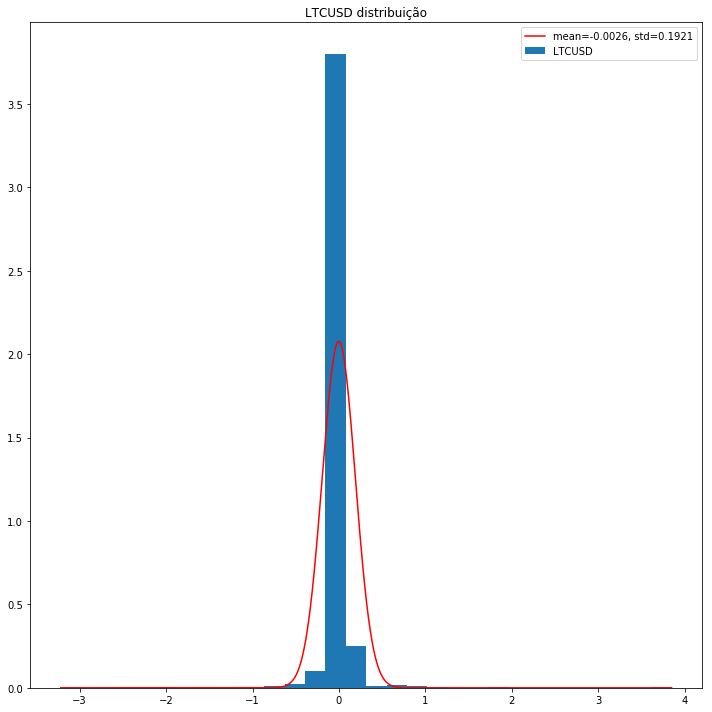

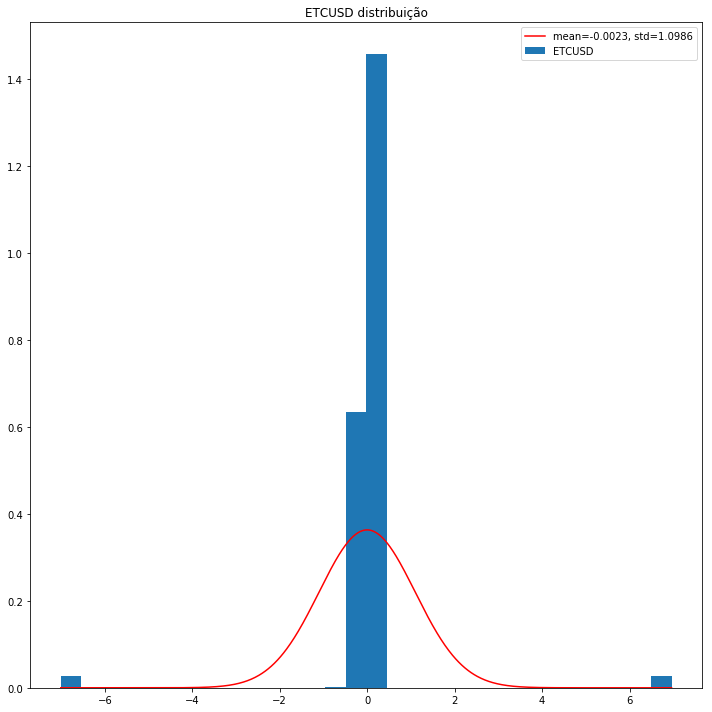

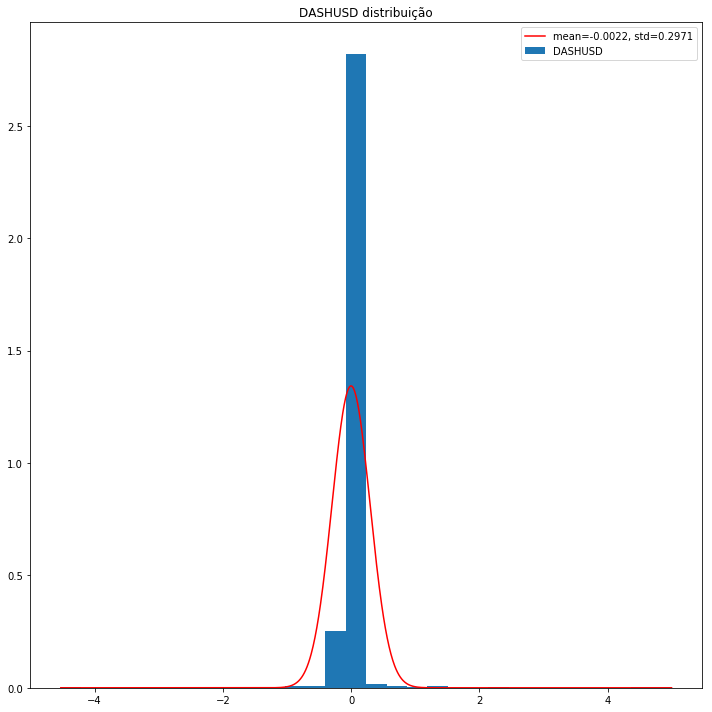

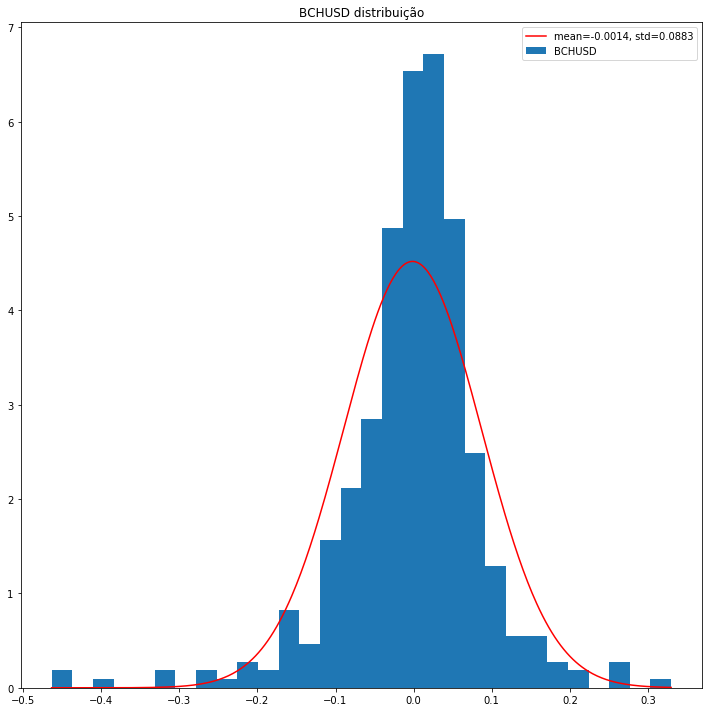

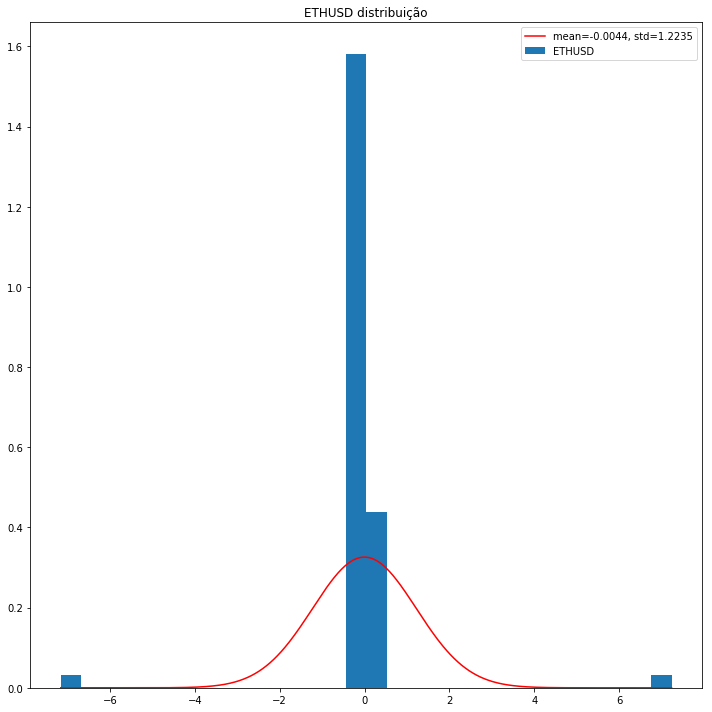

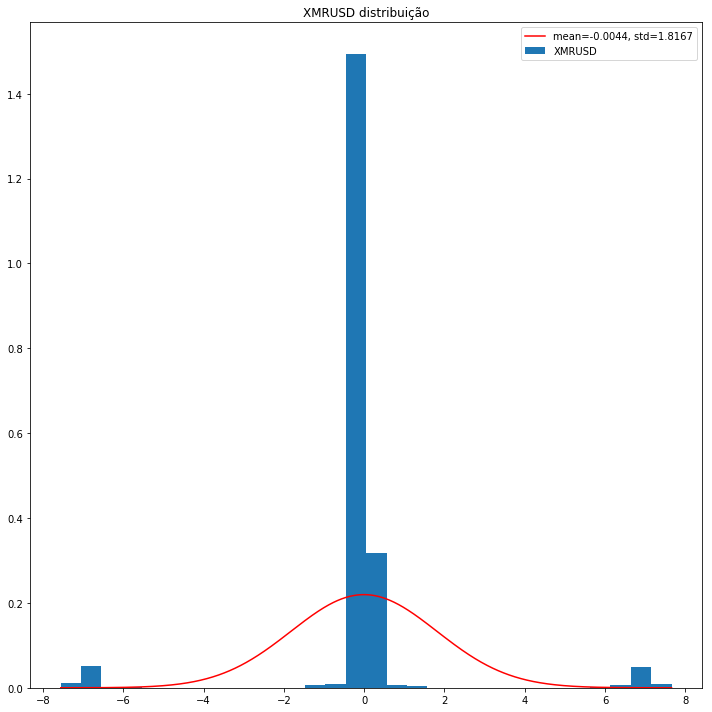

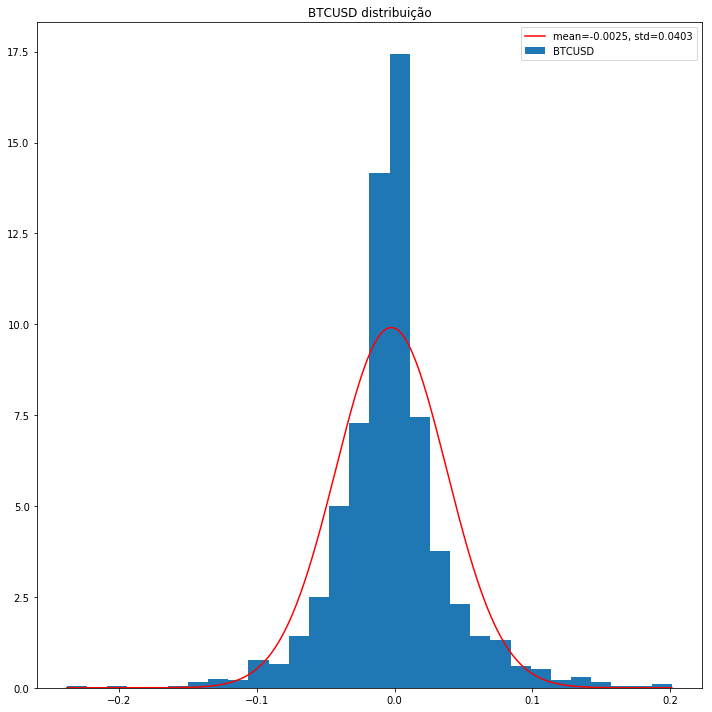

In [4]:
import scipy.stats as stats
import matplotlib.pyplot as plt

for symbol in data.symbol.unique():

    values = data.pivot(columns='symbol', values='log_ret')[symbol].dropna()  # skip first NA value
    x = np.linspace(values.min(), values.max(), len(values))

    loc, scale = stats.norm.fit(values)
    param_density = stats.norm.pdf(x, loc=loc, scale=scale)
    label = 'mean=%.4f, std=%.4f' % (loc, scale)

    fig, ax = plt.subplots(figsize=(10, 10))
    plt.title(f'{symbol} distribuição')
    ax.hist(values, bins=30, normed=True)
    ax.plot(x, param_density, 'r-', label=label)
    ax.legend(loc='best')
    plt.tight_layout()

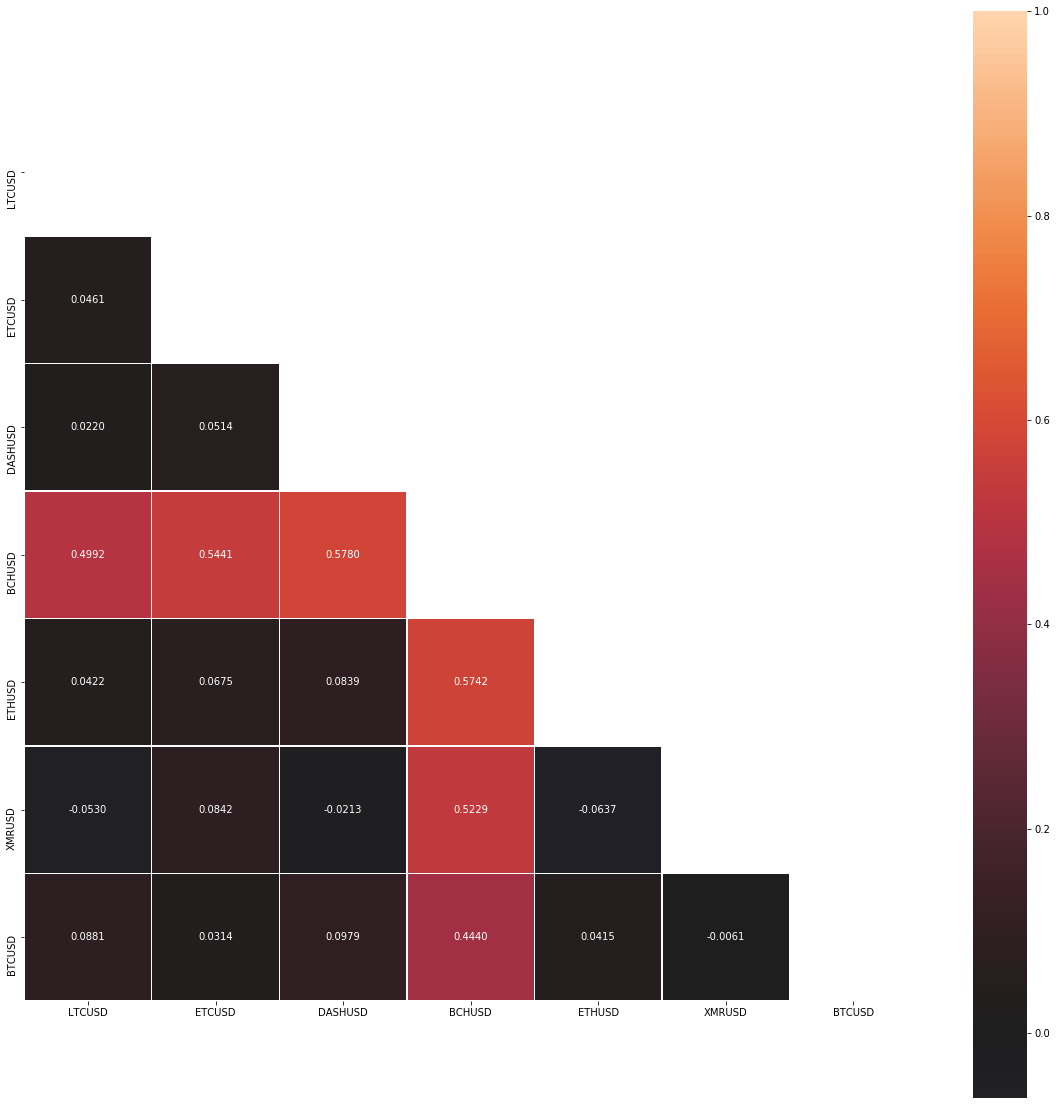

In [5]:
corr = pd.DataFrame()
 
for symbol in data.symbol.unique():
    corr[f'{symbol}'] = data.pivot(columns='symbol', values='log_ret')[symbol].dropna()
    
corr = corr.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

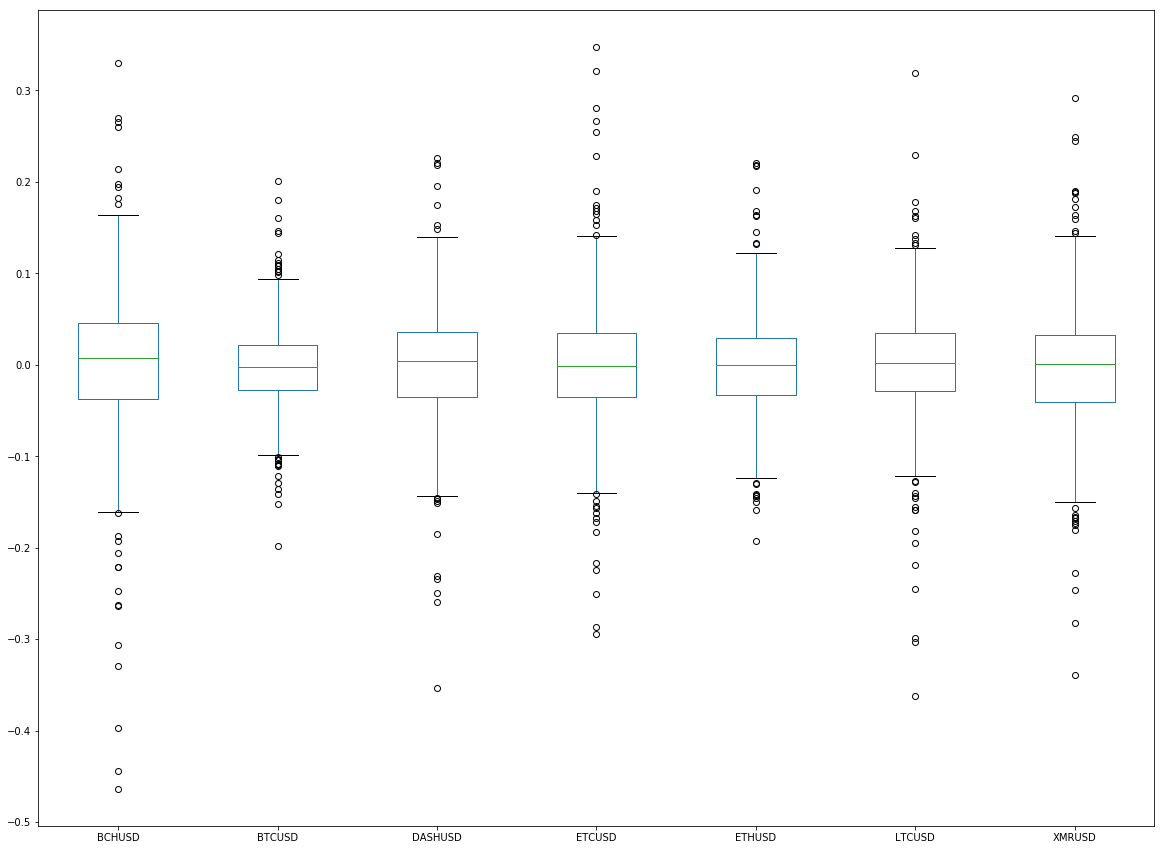

In [6]:
data.pivot(columns='symbol', values='log_ret').dropna().plot(kind='box', figsize=(20,15))

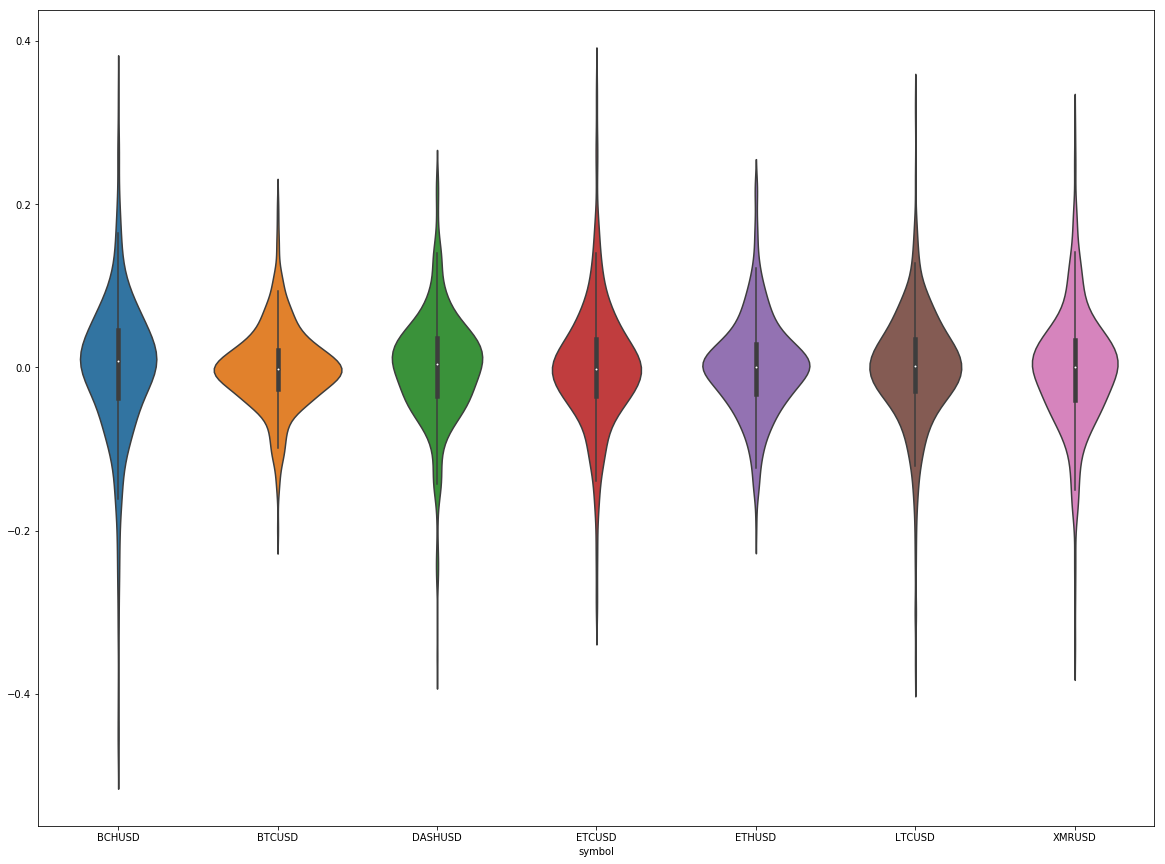

In [7]:
plt.figure(figsize=(20,15))
sns.violinplot(data=data.pivot(columns='symbol', values='log_ret').dropna())

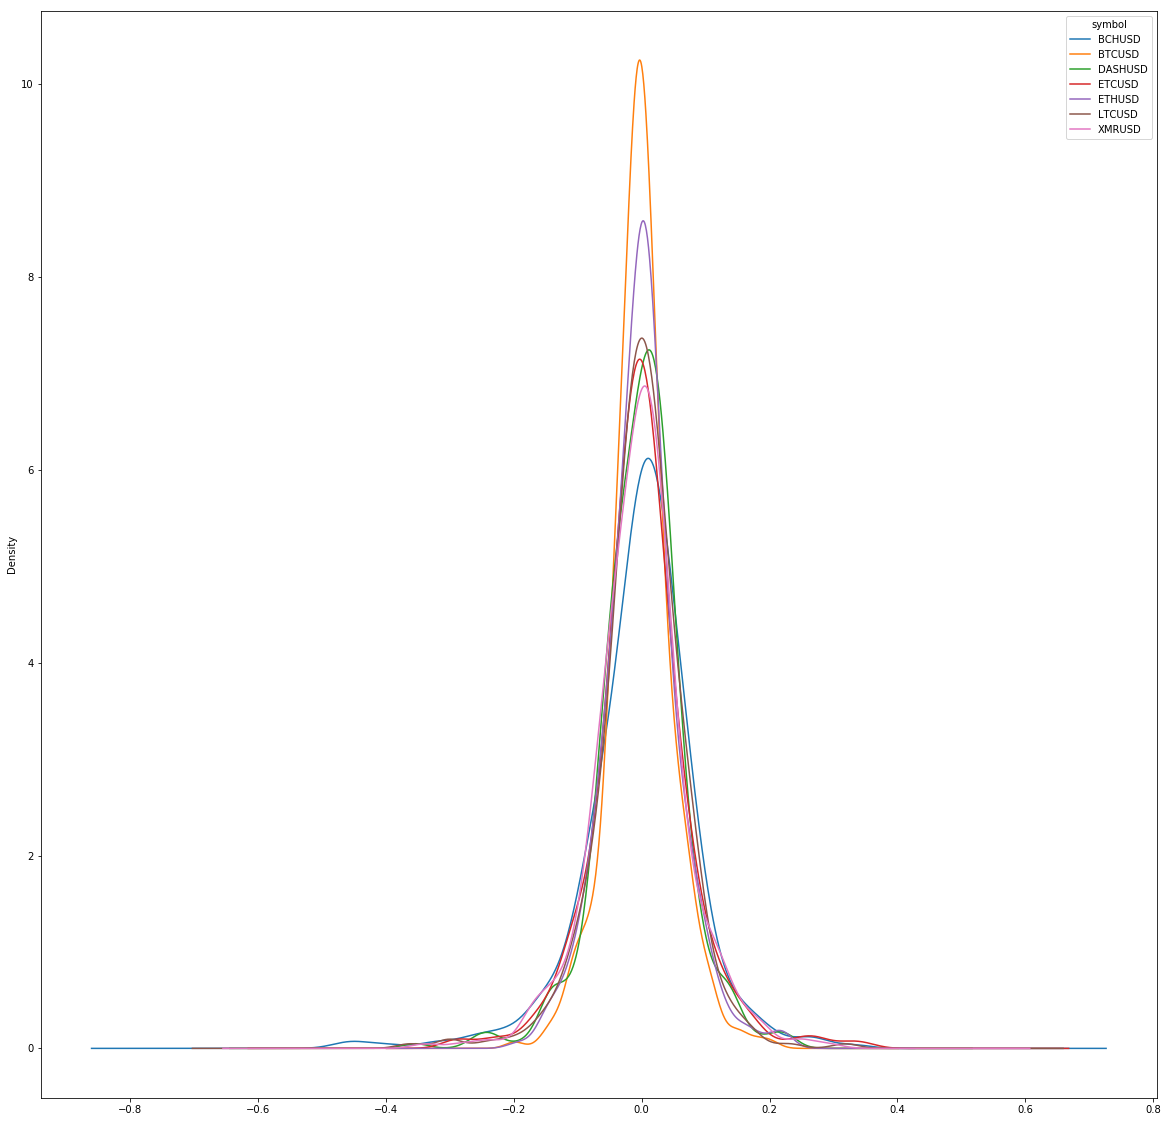

In [8]:
data.pivot(columns='symbol', values='log_ret').dropna().plot(kind='density', figsize=(20,20))

In [9]:
ret_seq = pd.DataFrame()


def return_sequence(df, side='positive'):
    data = {}
    
    for column in df.columns:
        seq = 0
        seq_list =[]
        for idx in df.index:
            if side == 'positive':
                if data_symbol[column][idx] >= 0:
                    seq += 1
                else:
                    seq = 0
            elif side == 'negative':
                if data_symbol[column][idx] < 0:
                    seq += 1
                else:
                    seq = 0
            seq_list.append(seq)
                    
        data.update({column: seq_list})
    df_return = pd.DataFrame.from_dict(data)
    df_return.index =  df.index

    return df_return
            
            
data_symbol = data.pivot(columns='symbol', values='log_ret').dropna()



In [10]:
retur_sequence = return_sequence(data_symbol)
retur_sequence.describe()

,BCHUSD,BTCUSD,DASHUSD,ETCUSD,ETHUSD,LTCUSD,XMRUSD
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,1.104623,0.858881,1.080292,0.982968,1.046229,0.961071,0.895377
std,1.431783,1.187142,1.466995,1.508416,1.504564,1.233058,1.228226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000
max,9.000000,6.000000,9.000000,9.000000,9.000000,6.000000,8.000000


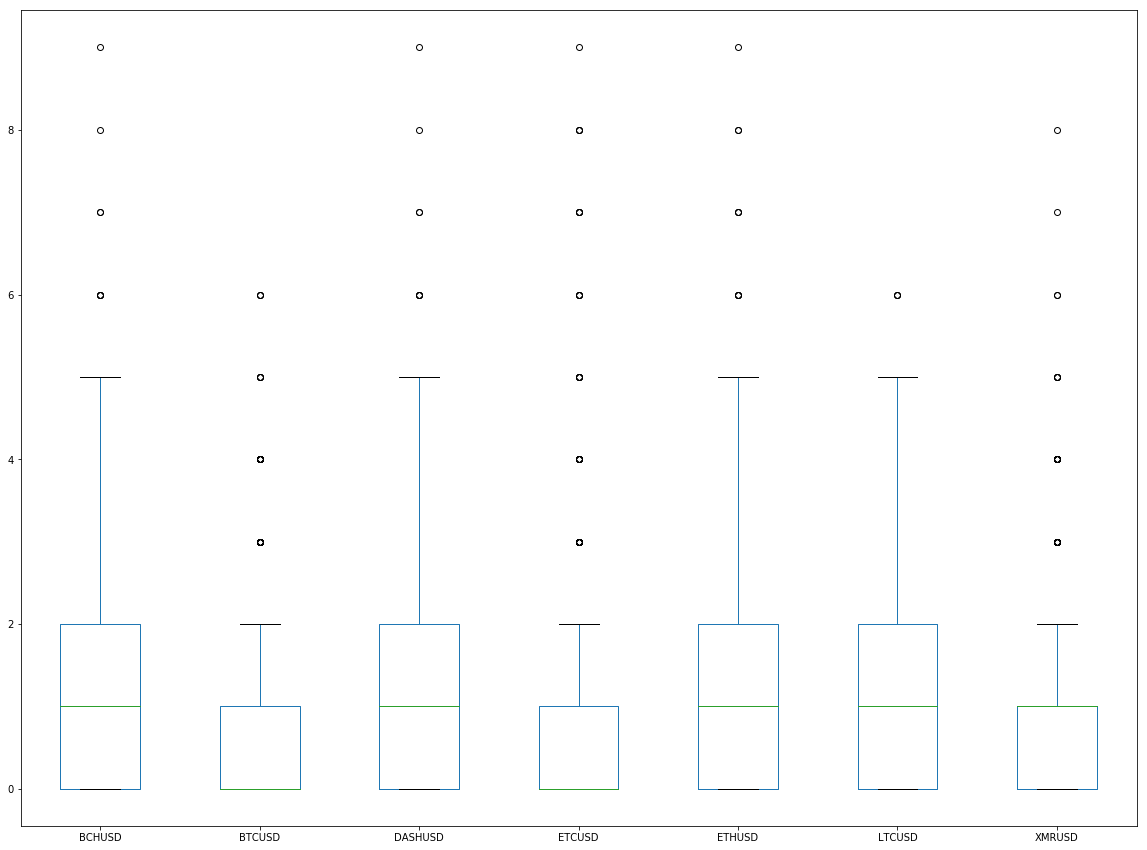

In [11]:
retur_sequence.plot(kind='box', figsize=(20,15))

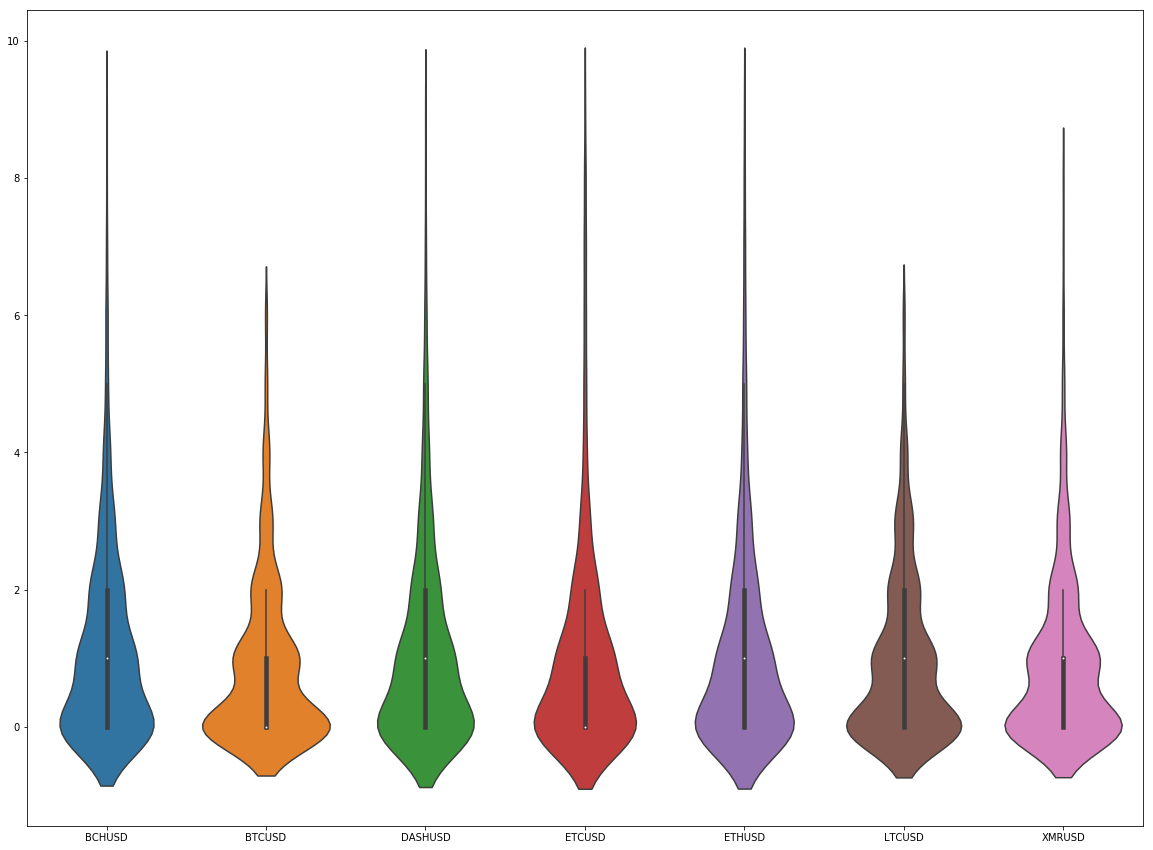

In [12]:
plt.figure(figsize=(20,15))
sns.violinplot(data=retur_sequence)

In [13]:
retur_sequence_negative = return_sequence(data_symbol, side='negative')
retur_sequence_negative.describe()

,BCHUSD,BTCUSD,DASHUSD,ETCUSD,ETHUSD,LTCUSD,XMRUSD
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,0.793187,1.024331,0.822384,0.936740,1.036496,0.885645,0.790754
std,1.180555,1.363064,1.158251,1.243868,1.612794,1.233303,1.014534
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,6.000000,8.000000,7.000000,8.000000,10.000000,8.000000,5.000000


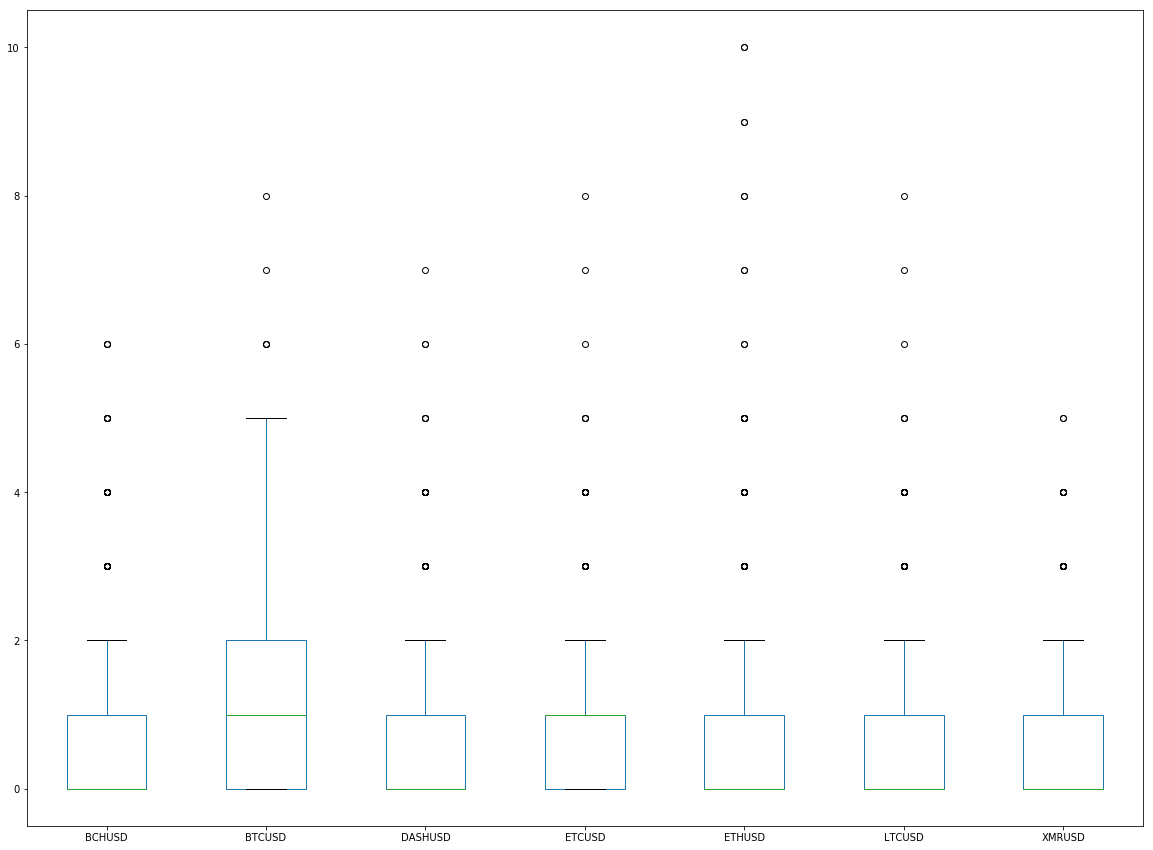

In [14]:
retur_sequence_negative.plot(kind='box', figsize=(20,15))

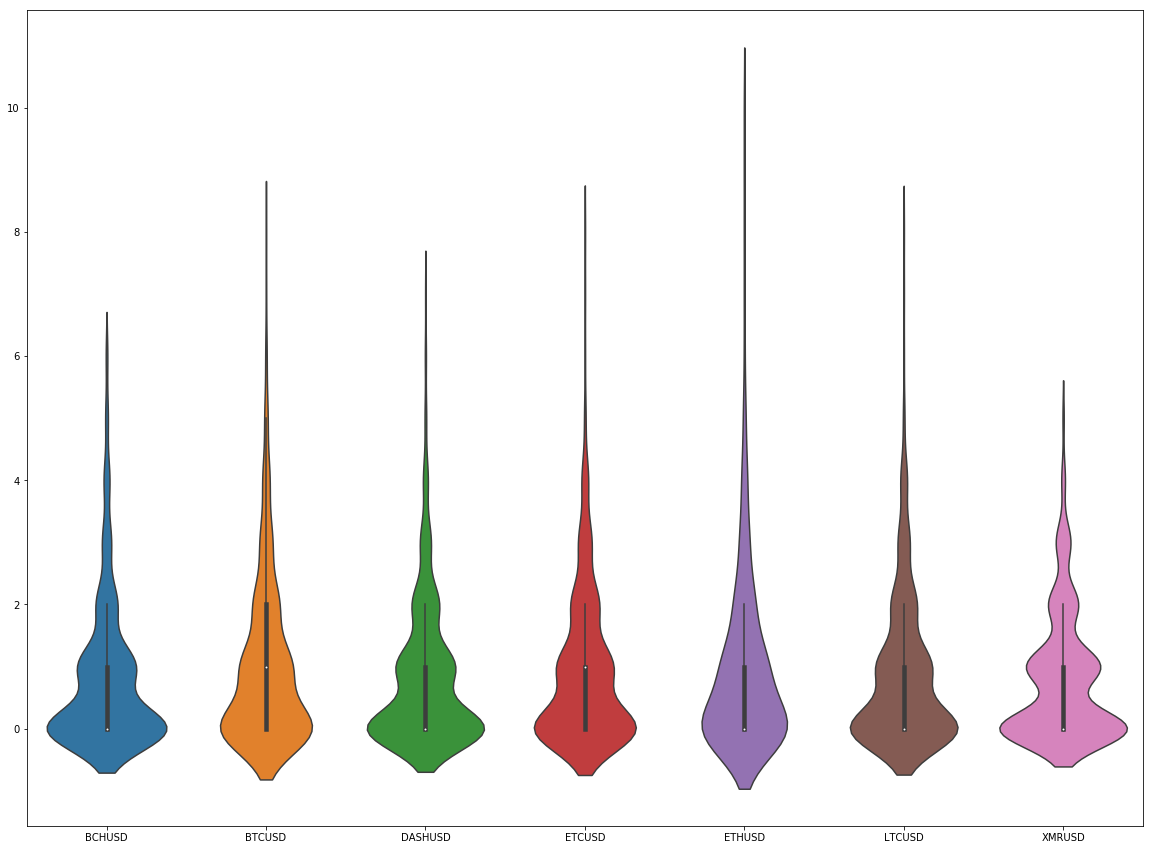

In [15]:
plt.figure(figsize=(20,15))
sns.violinplot(data=retur_sequence_negative)

Markowitz

In [16]:
returns = data.pivot(columns='symbol', values='log_ret').dropna()
risk_free_rate = 0.1

In [17]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [18]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [19]:
def display_ef_with_selected(returns, risk_free_rate):
    
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=mean_returns.index,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=mean_returns.index,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Returns and Volatility\n")
    for i, txt in enumerate(mean_returns.index):
        print (txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(mean_returns.index):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='X',color='r',s=200, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='X',color='g',s=200, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.18
Annualised Volatility: 0.93


symbol      BCHUSD  BTCUSD  DASHUSD  ETCUSD  ETHUSD  LTCUSD  XMRUSD
allocation     0.0     0.0      0.0     0.0   100.0     0.0     0.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: -0.15
Annualised Volatility: 0.76


symbol      BCHUSD  BTCUSD  DASHUSD  ETCUSD  ETHUSD  LTCUSD  XMRUSD
allocation    0.47   71.24     10.2     0.0   18.09     0.0     0.0
--------------------------------------------------------------------------------
Individual Returns and Volatility

BCHUSD : annuaised return -0.35 , annualised volatility: 1.4
BTCUSD : annuaised return -0.26 , annualised volatility: 0.79
DASHUSD : annuaised return 0.04 , annualised volatility: 1.06
ETCUSD : annuaised return 0.13 , annualised volatility: 1.19
ETHUSD : an

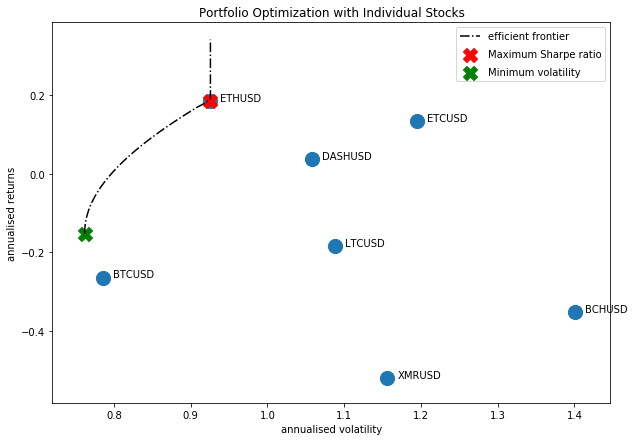

In [20]:
display_ef_with_selected(returns, risk_free_rate)